# CURRENT QUIVER PLOT

In [7]:
#masukin library dulu 
import os
os.environ['PROJ_LIB'] = r'C:/Users/user/anaconda3/Lib/site-packages/mpl_toolkits/basemap'
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap

# Input Data Arus

In [9]:
#masukin lokasi .nc nya dimana
fn='D:/smt7/asisten andat/3hrly.nc4'
#buka file nc nya dan liat isinya ada apa aja (variabel dan dimensi)
ds=nc.Dataset(fn)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.0 NAVO_netcdf_v1.0
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBu0.08/expt_19.1/2000/3hrly; Translation Date = 2020-09-22T03:29:47.900Z
    geospatial_lat_min: -7.28000020980835
    geospatial_lat_max: -2.319999933242798
    geospatial_lon_min: 94.9599609375
    geospatial_lon_max: 102.0
    dimensions(sizes): time(248), depth(1), lat(63), lon(89)
    variables(dimensions): int16 water_u(time,depth,lat,lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon), int16 water_v

## Deklarasi Data Arus
data arus yang digunakan dalam plot quiver merupakan data spasial, jadi gausah diambil di grid tertentu

In [12]:
u=ds.variables['water_u'][:,:,:,:]
v=ds.variables['water_v'][:,:,:,:]
lon=ds.variables['lon'][:]
lat=ds.variables['lat'][:]
time=ds.variables['time'][:]

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u))
print('dimensi v',np.shape(v))
print('dimensi lon',np.shape(lon))
print('dimensi lat',np.shape(lat))
print('dimensi time',np.shape(time))

dimensi u (248, 1, 63, 89)
dimensi v (248, 1, 63, 89)
dimensi lon (89,)
dimensi lat (63,)
dimensi time (248,)


## Membuat Current Quiver Plot

ValueError: too many values to unpack (expected 2)

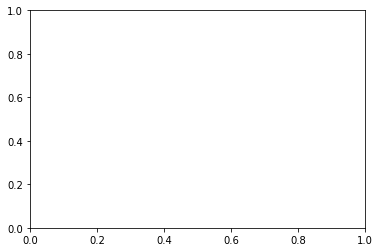

In [16]:
m = Basemap(projection='merc',llcrnrlat=-2.3,urcrnrlat=-7.3,
           llcrnrlon=95,urcrnrlon=102,lat_ts=5,resolution='i')

# Create colour bar
#norm = matplotlib.colors.Normalize()
#norm.autoscale(temp)
#cm = matplotlib.cm.CMRmap

#sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
#sm.set_array([])

# Plot
q = m.quiver(lon,lat,u,v)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.quiverkey(q,0.9, 0.05, 30, r'$30 \frac{Kp}{h}$',labelpos='W',fontproperties={'size': 15,'weight': 'bold'})
cbar = plt.colorbar(sm)

plt.show()